In [ ]:
!pip install -q condacolab

import condacolab
condacolab.install()

# install ngspice packages, including executables & master package
!conda install -c conda-forge ngspice-exe  
!conda install -c conda-forge ngspice      
!conda install -c conda-forge ngspice-lib

!pip install PySpice

!pyspice-post-installation --check-install


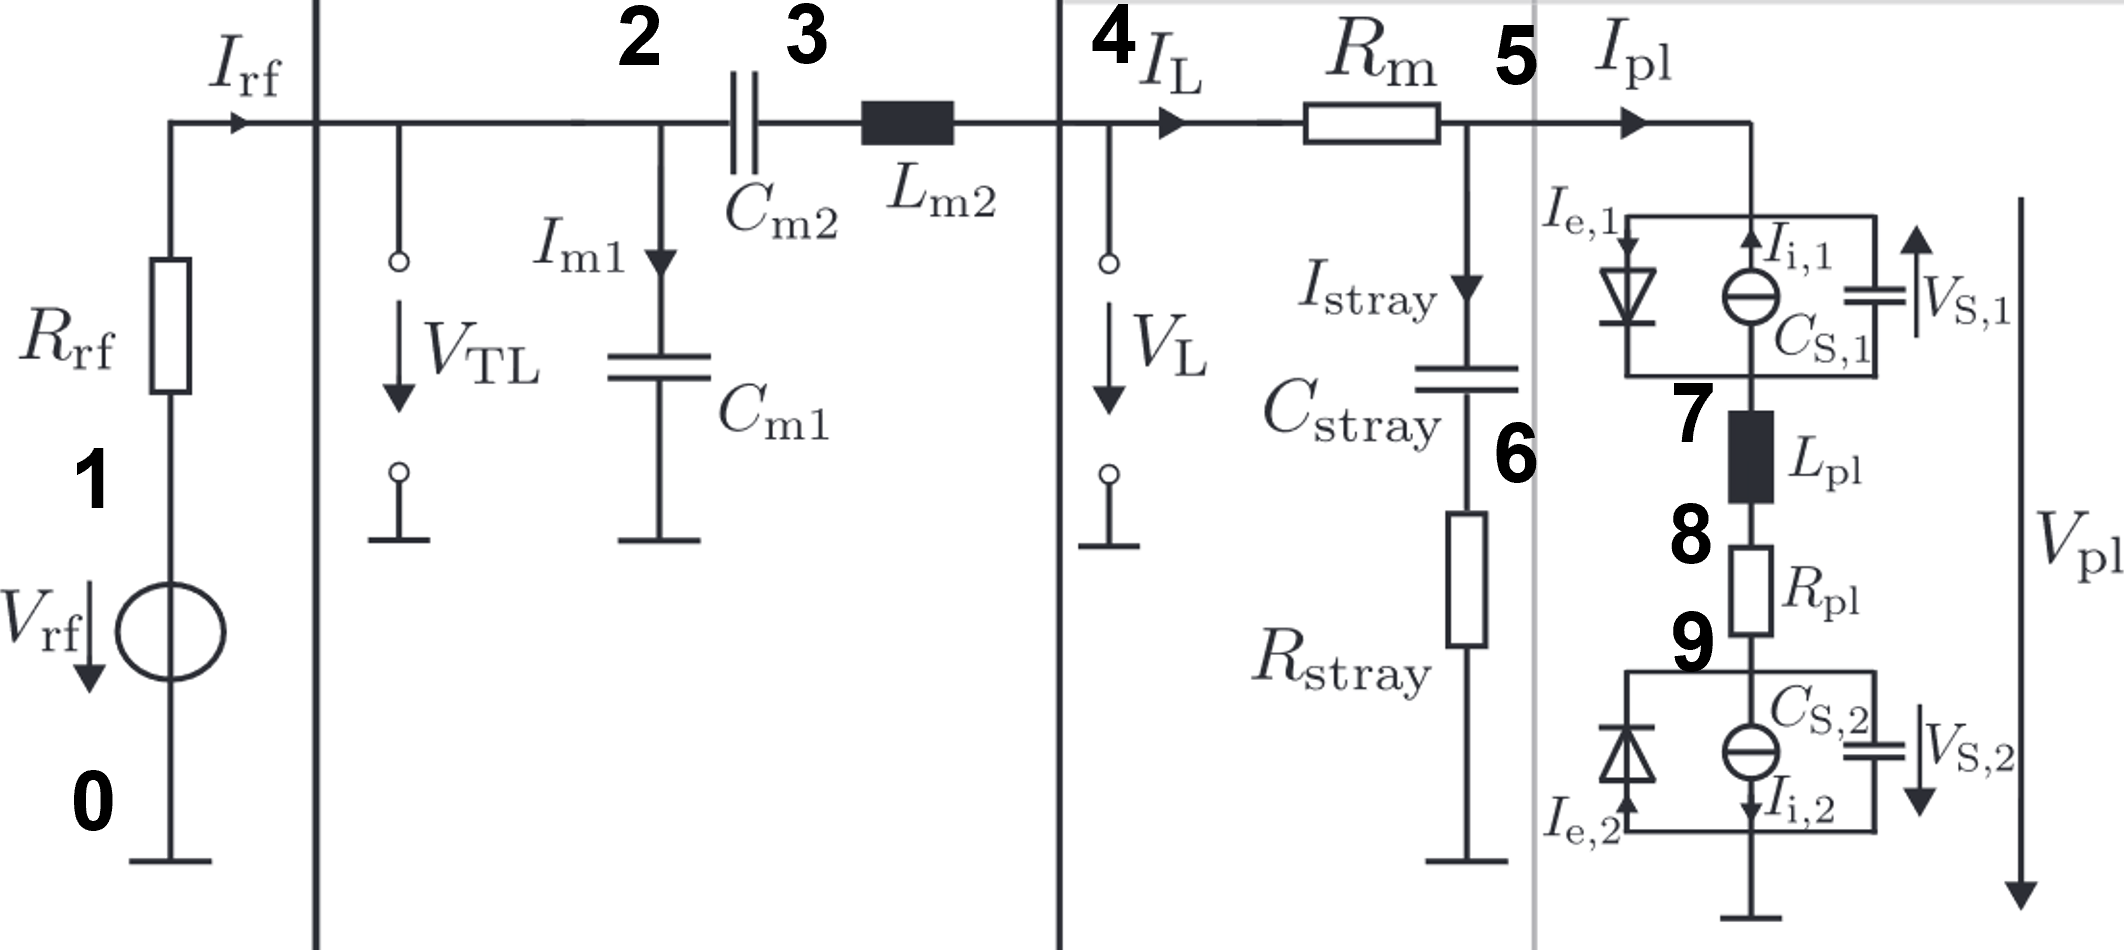

In [1]:
default_config = {
    "name": "default",
    "comment": "Default configuration",
    "Vm":  180,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  1.25e+15,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 5.7e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 501e-12,
    "val_C_m2": 128.37e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.01,
    "val_C_stray": 350e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 5e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC1_config = {
    "name": "PC1",
    "comment": "Пример из статьи 0.66 Pa",
    "Vm":  100,                            # Амплитуда ВЧ источника [V]
    "f0":  13.56e6,
    "p0":  0.66,
    "T0":  300,                            # Температура буферного газа [К]
    "ne":  1.25e+15,                       # Начальное приближение плотности электронов [м^-3]
    "l_B": 5.7e-2,                         # Толщина bulk плазмы [м]
    "Ae": 0.01,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.03,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 100e-12,
    "val_C_m2": 175e-12,
    "val_L_m2": 1500e-9,
    "val_R_m":  0.5,
    "val_C_stray": 200e-12,
    "val_R_stray": 0.5,
    "matching_flag": True,                # Флаг включения итераций согласования
    "eps_ne": 5e12,                        # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                 # Отладочные графики
}

LC2_config = {
    "name": "PC2",
    "comment": "Пример из статьи 200 Pa",
    "Vm":  100,                            # Амплитуда ВЧ источника [V]
    "f0":  13.56e6,
    "p0":  200,
    "T0":  300,                            # Температура буферного газа [К]
    "ne":  1.25e+15,                       # Начальное приближение плотности электронов [м^-3]
    "l_B": 5.7e-2,                         # Толщина bulk плазмы [м]
    "Ae": 0.01,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.03,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 100e-12,
    "val_C_m2": 175e-12,
    "val_L_m2": 1500e-9,
    "val_R_m":  0.5,
    "val_C_stray": 200e-12,
    "val_R_stray": 0.5,
    "matching_flag": True,                # Флаг включения итераций согласования
    "eps_ne": 1e12,                        # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                 # Отладочные графики
}

LC3_config = {
    "name": "PC3",
    "comment": "ДТР 366 см2 симметрично 10 см 81.36 МГц 100 Вт 3 Па",
    "Vm":  200,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  3,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  1.25e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 622.85e-12,
    "val_C_m2": 127.28e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.01,
    "val_C_stray": 350e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC4_config = {
    "name": "PC4",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 100 Вт 1 Па",
    "Vm":  200,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  1,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  1.25e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 681e-12,
    "val_C_m2": 125e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC5_config = {
    "name": "PC5",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 1 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  1,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  1.25e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 758.1e-12,
    "val_C_m2": 123.4e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC6_config = {
    "name": "PC6",
    "comment": "АС 100 см2 симметрично 10 см 81.36 МГц 100 Вт 3 Па",
    "Vm":  200,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  2,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  4.2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.01,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.05,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 323.50e-12,
    "val_C_m2": 239.82e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 88e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC7_config = {
    "name": "PC7",
    "comment": "Статья Andries 13.56",
    "Vm":  100,                              # Амплитуда ВЧ источника [V]
    "f0":  13.56e6,
    "p0":  6,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 130e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.019,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.019,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 564e-12,
    "val_C_m2": 159e-12,
    "val_L_m2": 1500e-9,
    "val_R_m":  0.05,
    "val_C_stray": 88e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 3e15,                            # Критерий сходимости расчета ne
    "max_iter_ne": 40,
    "verbose_plots": False                   # Отладочные графики
}

LC8_config = {
    "name": "PC8",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 3 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  3,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 678e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC9_config = {
    "name": "PC9",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 4.5 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  4.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC91_config = {
    "name": "PC9-1",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 4 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  4,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC92_config = {
    "name": "PC9-2",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 3.5 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  3.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC92_config = {
    "name": "PC9-2",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 3 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  3,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC93_config = {
    "name": "PC9-3",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 2.5 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  2.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC94_config = {
    "name": "PC9-4",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 4.5 Па",
    "Vm":  230,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  4.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC95_config = {
    "name": "PC9-5",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 4 Па",
    "Vm":  230,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  4,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC96_config = {
    "name": "PC9-6",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 3.5 Па",
    "Vm":  230,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  3.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC97_config = {
    "name": "PC9-7",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 3 Па",
    "Vm":  230,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  3,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC98_config = {
    "name": "PC9-8",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 2.5 Па",
    "Vm":  230,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  2.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC99_config = {
    "name": "PC9-9",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 4 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  4,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC991_config = {
    "name": "PC9-91",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 4.5 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  4.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC992_config = {
    "name": "PC9-92",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 225 Вт 5 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC993_config = {
    "name": "PC9-93",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 72 Вт 5.5 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  5.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC994_config = {
    "name": "PC9-94",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 72 Вт 6 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  6,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC995_config = {
    "name": "PC9-95",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 72 Вт 6.5 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  6.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC996_config = {
    "name": "PC9-96",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 72 Вт 7 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  7,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC997_config = {
    "name": "PC9-97",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 72 Вт 8 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  8,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC998_config = {
    "name": "PC9-98",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 72 Вт 3 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  3,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC999_config = {
    "name": "PC9-99",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 72 Вт 2 Па",
    "Vm":  170,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  2,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC9991_config = {
    "name": "PC9-991",
    "comment": "ДТР 500 см2 симметрично 10 см 78.36 МГц 72 Вт 4.5 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  78.36e6,
    "p0":  4.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC9992_config = {
    "name": "PC9-9992",
    "comment": "ДТР 500 см2 симметрично 10 см 78.36 МГц 72 Вт 2.5 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  78.36e6,
    "p0":  2.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC9993_config = {
    "name": "PC9-9993",
    "comment": "ДТР 500 см2 симметрично 10 см 81.36 МГц 72 Вт 4 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  83.36e6,
    "p0":  4,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 500e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC10_config = {
    "name": "PC10",
    "comment": "ДТР 366 см2 l=1 симметрично 10 см 81.36 МГц 225 Вт 2.7 Па",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  2.7,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 550.06e-12,
    "val_C_m2": 131.21e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.1,
    "val_C_stray": 350e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 6e14,                            # Критерий сходимости расчета ne
    "max_iter_ne": 30,
    "verbose_plots": False                   # Отладочные графики
}

LC9994_config = {
    "name": "PC9-9994",
    "comment": "ДТР 366 см2 симметрично 10 см 81.36 МГц 225 Вт 4.5 Па",
    "Vm":  200,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  2.5,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  2e+16,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0366,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 641e-12,
    "val_C_m2": 123.5e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 350e-12,
    "val_R_stray": 0.03,
    "matching_flag": True,                   # Флаг включения итераций согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC100_config = {
    "name": "PC10-0",
    "comment": "Макет M1 462 см2 симметрично 10 см 81.36 МГц 2.45 Па 154.10+62.81+7.73=224.65 [W]",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  2.45,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  44e+15,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0462,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0462,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 653.99e-12,
    "val_C_m2": 123.74e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 410e-12,
    "val_R_stray": 0.05,
    "matching_flag": True,                   # Флаг включения итераций ВЧ согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC101_config = {
    "name": "PC10-1",
    "comment": "Макет M1 462 см2 симметрично 10 см 80.36 МГц 2.45 Па 154.21+62.71+7.89=224.81 [W]",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  80.36e6,
    "p0":  2.45,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  44e+15,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0462,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0462,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 660.36e-12,
    "val_C_m2": 127.66e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 410e-12,
    "val_R_stray": 0.05,
    "matching_flag": True,                   # Флаг включения итераций ВЧ согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC102_config = {
    "name": "PC10-2",
    "comment": "Макет M1 462 см2 симметрично 10 см 75 МГц 2.45 Па [W]",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  75e6,
    "p0":  2.45,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  44e+15,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0462,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0462,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 701.84e-12,
    "val_C_m2": 152.53e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 410e-12,
    "val_R_stray": 0.05,
    "matching_flag": True,                   # Флаг включения итераций ВЧ согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC103_config = {
    "name": "PC10-3",
    "comment": "Макет M1 462 см2 симметрично 10 см 70 МГц 2.45 Па [W]",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  70e6,
    "p0":  2.45,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  44e+15,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0462,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0462,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 746.27e-12,
    "val_C_m2": 183.53e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 410e-12,
    "val_R_stray": 0.05,
    "matching_flag": True,                   # Флаг включения итераций ВЧ согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC104_config = {
    "name": "PC10-4",
    "comment": "Макет M1 462 см2 симметрично 10 см 60 МГц 2.45 Па [W]",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  60e6,
    "p0":  2.45,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  37e+15,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0462,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0462,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 853.09e-12,
    "val_C_m2": 288.57e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.05,
    "val_C_stray": 410e-12,
    "val_R_stray": 0.05,
    "matching_flag": True,                   # Флаг включения итераций ВЧ согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}

LC105_config = {
    "name": "PC10-5",
    "comment": "Макет M1 462 см2 симметрично 10 см 50 МГц 2.45 Па [W]",
    "Vm":  300,                              # Амплитуда ВЧ источника [V]
    "f0":  50e6,
    "p0":  2.45,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  33e+15,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.0462,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.0462,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 1000e-12,
    "val_C_m2": 100.38e-12,
    "val_L_m2": 200e-9,
    "val_R_m":  0.05,
    "val_C_stray": 410e-12,
    "val_R_stray": 0.05,
    "matching_flag": True,                   # Флаг включения итераций ВЧ согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 20,
    "verbose_plots": False                   # Отладочные графики
}


LC205_config = {
    "name": "PC20-5",
    "comment": "Макет d80 симметрично 10 см 63.9 МГц 1.6 Па [W]",
    "Vm":  250,                              # Амплитуда ВЧ источника [V]
    "f0":  63.9e6,
    "p0":  1.6,
    "T0":  300,                              # Температура буферного газа [К]
    "ne":  1e+17,                         # Начальное приближение плотности электронов [м^-3]
    "l_B": 10e-2,                           # Толщина bulk плазмы [м]
    "Ae": 0.005,                            # Площадь нагруженного электрода [м^2]
    "Ag": 0.009,                            # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 436e-12,
    "val_C_m2": 295e-12,
    "val_L_m2": 80e-9,
    "val_R_m":  0.05,
    "val_C_stray": 75e-12,
    "val_R_stray": 0.013,
    "matching_flag": True,                   # Флаг включения итераций ВЧ согласования
    "eps_ne": 1e13,                            # Критерий сходимости расчета ne
    "max_iter_ne": 40,
    "verbose_plots": False                   # Отладочные графики
}

config = LC1_config

# Размер зеркала макета М1: 250х185 -> площадь 0.0462 м2, емкость при d=1 мм: 410 пФ
# Значения Rm и Rstray примерно соответствуют расчетам СУ с потерями

Config: PC1
Пример из статьи 0.66 Pa
Te=4.75 [eV] ne=1.25e+15
RF excitation: P0=25.00 [W], f0=13.56 [MHz], p=0.66 [Pa] Ar

=== SIMULATION STARTS ===

matching iteration # 1: C1=100.00 pF, C2=175.00 pF
  ne iteration # 1: Ppl=1.16 [W] Pguess=2.32 [W] ne=1.25e+15 [cm^-3], ne_new=6.25e+14 [cm^-3] |ne_new - ne|=6.25e+14
  ne iteration # 2: Ppl=0.77 [W] Pguess=1.18 [W] ne=6.25e+14 [cm^-3], ne_new=4.10e+14 [cm^-3] |ne_new - ne|=2.16e+14
  ne iteration # 3: Ppl=0.64 [W] Pguess=0.78 [W] ne=4.10e+14 [cm^-3], ne_new=3.35e+14 [cm^-3] |ne_new - ne|=7.49e+13
  ne iteration # 4: Ppl=0.59 [W] Pguess=0.64 [W] ne=3.35e+14 [cm^-3], ne_new=3.10e+14 [cm^-3] |ne_new - ne|=2.50e+13
  ne iteration # 5: Ppl=0.58 [W] Pguess=0.60 [W] ne=3.10e+14 [cm^-3], ne_new=3.02e+14 [cm^-3] |ne_new - ne|=8.03e+12
  ne iteration # 6: Ppl=0.58 [W] Pguess=0.58 [W] ne=3.02e+14 [cm^-3], ne_new=2.99e+14 [cm^-3] |ne_new - ne|=2.42e+12 <- ne CONVERGED
Z_l=(1.22, 72.79) [Ohm] ---> 72.80*exp(j*89.04deg)
Z_l (noind)=(1.22, 5.74) [Ohm]

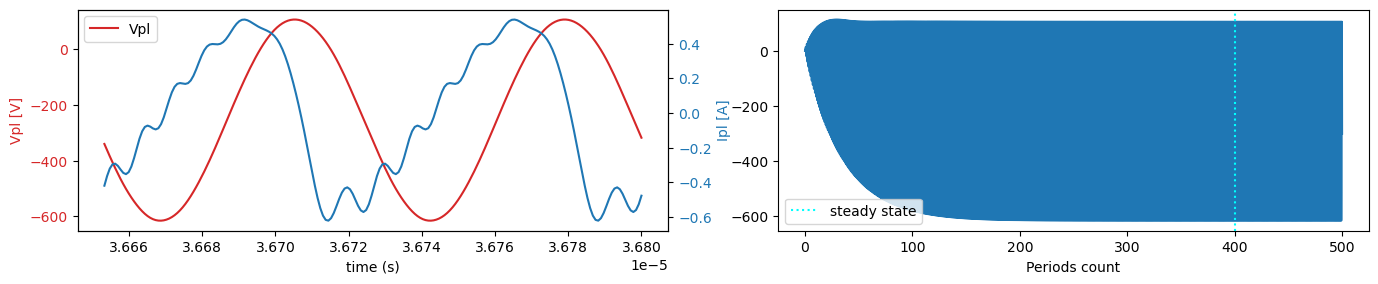

In [11]:
##### Извлекаем интересующие токи и напряжения

time_raw = np.array(analysis.time)

Vpl_raw = getU('5', '0', analysis)           # Vpl
Ipl_raw = getU('8', '9', analysis)/out_Rp    # Ipl
V_R_rf_raw = getU('2', '1', analysis)        # Vrf
Irf_raw = V_R_rf_raw/val_R_rf                # Irf
Vl_raw = getU('3', '0', analysis)            # Vl
Il_raw = getU('4', '5', analysis)/val_R_m    # Il
Vs1_raw = getU('5', '7', analysis)           # Vs1
Vs2_raw = getU('9', '10', analysis)          # Vs2
V_R_rf_raw = getU('2', '1', analysis)        # Vrf
VRm_raw = getU('4', '5', analysis)           # VRm
VRstray_raw = getU('6', '0', analysis)       # VRm

# Строим ток и напряжение на плазме (2 периода)

first_steady_period = 400   # Номер периода, с которого считаем, что установившийся режим наступил

time_2_last_periods = extract_N_periods(time_raw, 1, 2, 'rev')
Vpl_2_last_periods = extract_N_periods(Vpl_raw, 1, 2, 'rev')
Ipl_2_last_periods = extract_N_periods(Ipl_raw, 1, 2, 'rev')

fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))

ax1[0].set_xlabel('time (s)')
ax1[0].set_ylabel('Vpl [V]', color='tab:red')
ax1[0].plot(time_2_last_periods, Vpl_2_last_periods, color='tab:red', label='Vpl')  # Показываем два _предпоследних_ периода, т.к.
ax1[0].tick_params(axis='y', labelcolor='tab:red')
ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Ipl [A]', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(time_2_last_periods, Ipl_2_last_periods, color='tab:blue', label='Ipl')
ax2.tick_params(axis='y', labelcolor='tab:blue')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1[0].legend()
ax1[1].plot(time_raw/Tf, Vpl_raw)  # Обзорный график для определения установившегося режима
ax1[1].axvline(first_steady_period, color='cyan', linestyle=':', label='steady state')
ax1[1].legend()
_=ax1[1].set_xlabel('Periods count')

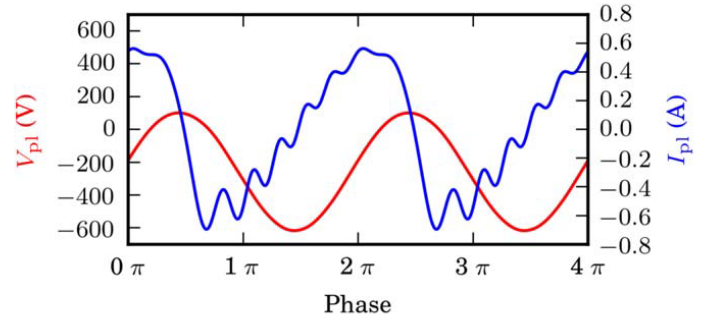

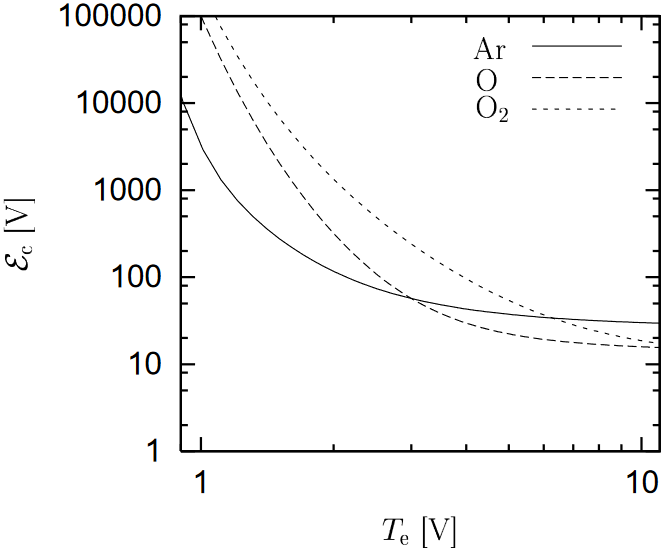

73.73272734903101
-1.333576379501045
-2.8892282478187608
89.13228644624643
Z=1.116599543726735 j73.72427203971223 testabs=6.775825626695581 testangle=80.47828668034724


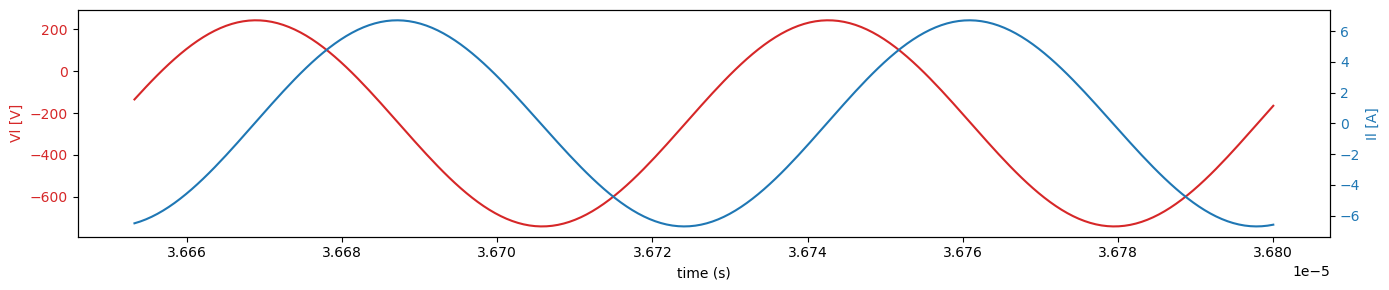

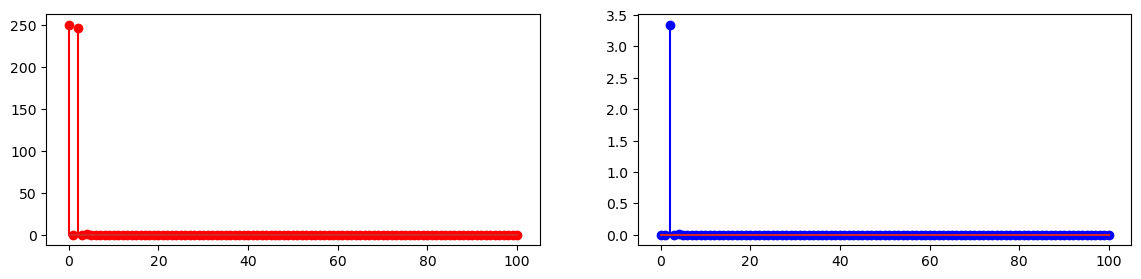

In [12]:
Vl_2_last_periods = extract_N_periods(Vl_raw, 1, 2, 'rev')
Il_2_last_periods = extract_N_periods(Il_raw, 1, 2, 'rev')

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 3))

ax1.set_xlabel('time (s)')
ax1.set_ylabel('Vl [V]', color='tab:red')
ax1.plot(time_2_last_periods, Vl_2_last_periods, color='tab:red', label='Vl')  # Показываем два _предпоследних_ периода, т.к.
ax1.tick_params(axis='y', labelcolor='tab:red')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Il [A]', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(time_2_last_periods, Il_2_last_periods, color='tab:blue', label='Il')
ax2.tick_params(axis='y', labelcolor='tab:blue')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

spectraVl = rfft(Vl_2_last_periods)/(2*sim_periods_div)
spectraIl = rfft(Il_2_last_periods)/(2*sim_periods_div)
freqsl = rfftfreq(Vl_2_last_periods.size, d=Tf/sim_periods_div)

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))
ax2[0].stem(abs(spectraVl), linefmt='red')
ax2[1].stem(abs(spectraIl), linefmt='blue')

#print(abs(spectraVl))
#print(abs(spectraIl))

#print(np.angle(spectraVl))
#print(np.angle(spectraIl))

UU=abs(spectraVl)[2]
II=abs(spectraIl)[2]

Ua=np.angle(spectraVl)[2]
Ia=np.angle(spectraIl)[2]

print(UU/II)

print(Ua)
print(Ia)
print(np.degrees(Ua-Ia))
print(f'Z={UU/II*np.cos(Ua-Ia)} j{UU/II*np.sin(Ua-Ia)} testabs={np.abs(complex(1.1208663281581175, 6.6824749605057185))} testangle={np.degrees(np.angle(complex(1.1208663281581175, 6.6824749605057185)))}')

In [13]:
a = np.diff(time_raw)
np.set_printoptions(threshold=100)
print(a)

[7.37463127e-12 6.19508023e-13 1.23901605e-12 ... 7.37463127e-10
 7.37463127e-10 1.48060702e-10]


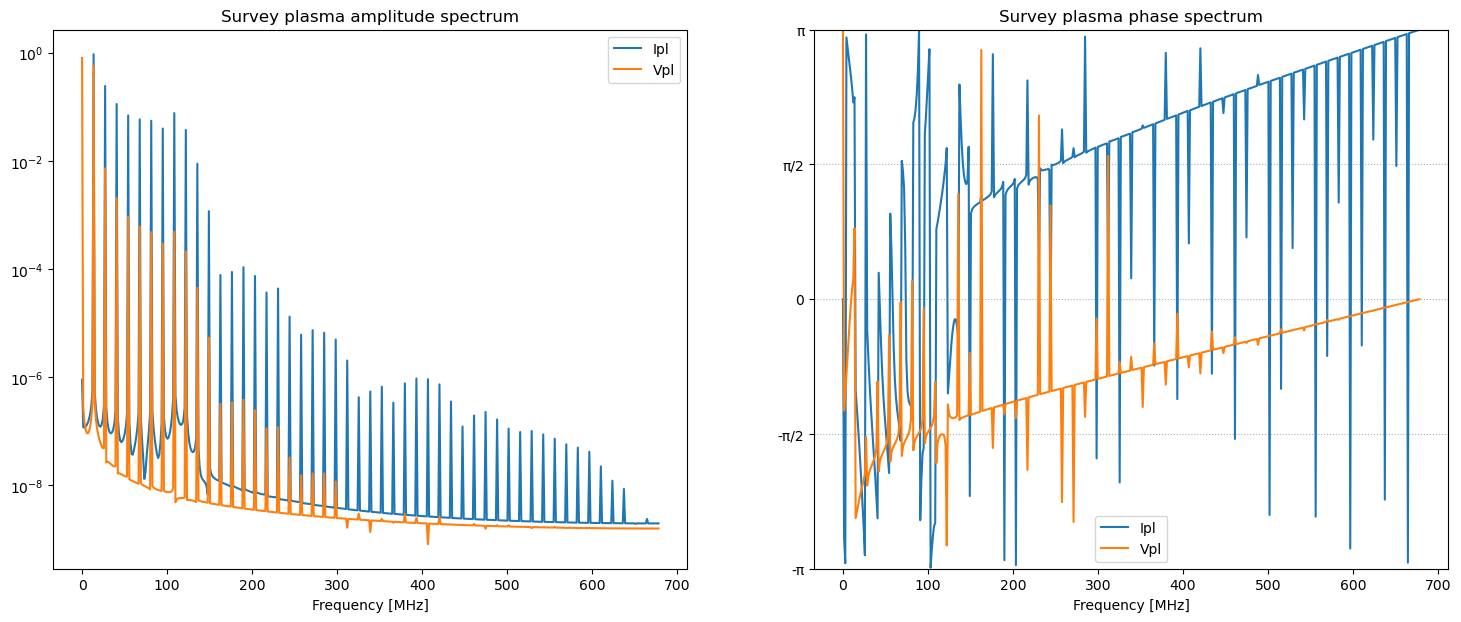

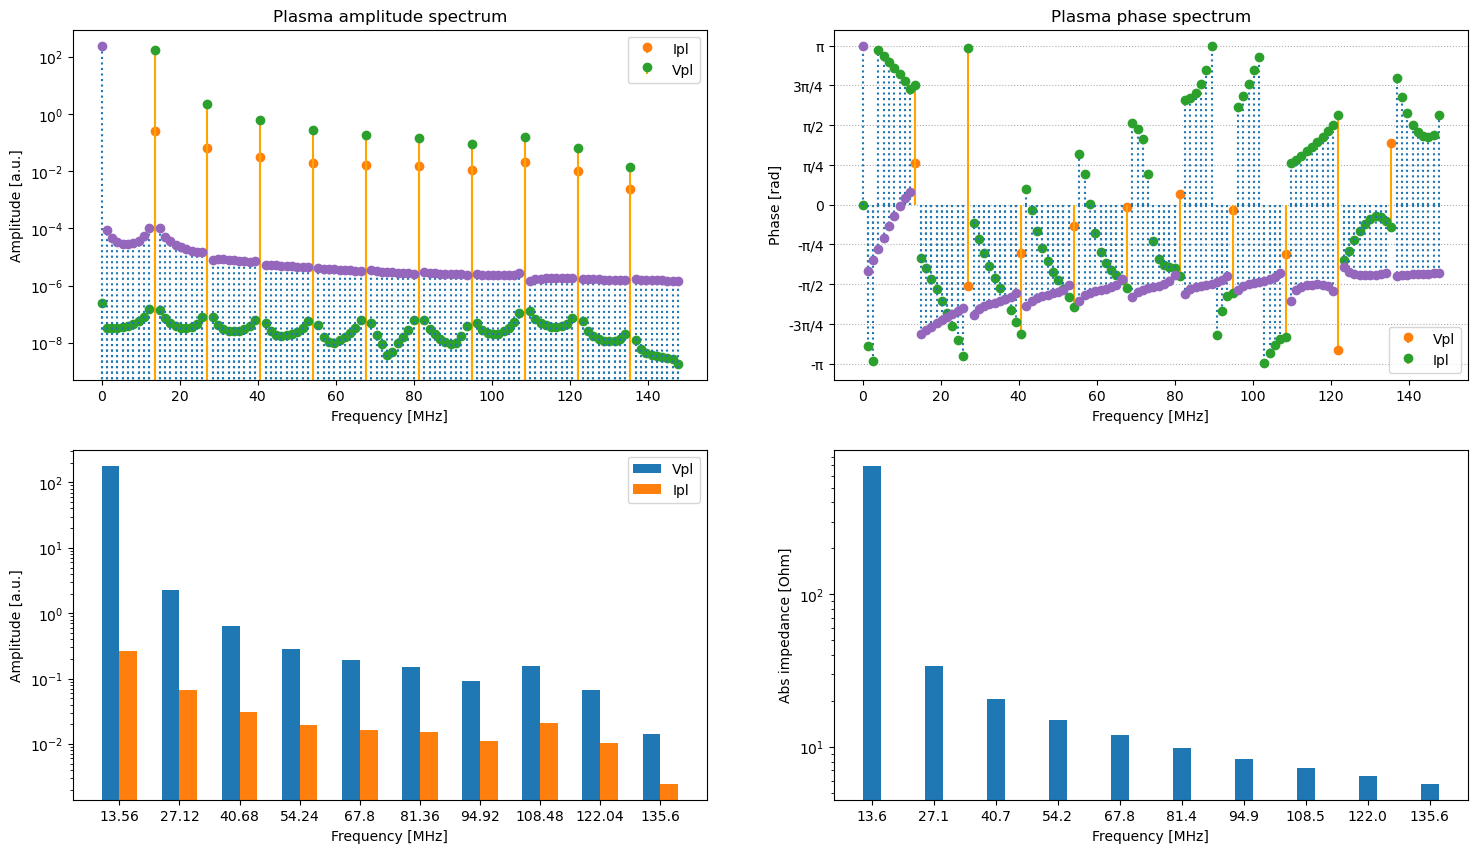

In [14]:
# Спектры

(_, Ipl_abs, Ipl_phase, freqs, freqsMHz, reduced_freqs, Ipl_reduced_abs, Ipl_reduced_angle, waste_freqs, Ipl_waste_abs, Ipl_waste_angle, true_freqs, Ipl_true_abs, Ipl_true_angle) = get_spectra(Ipl_raw)
(_, Vpl_abs, Vpl_phase, _, _, _, Vpl_reduced_abs, Vpl_reduced_angle, _, Vpl_waste_abs, Vpl_waste_angle, _, Vpl_true_abs, Vpl_true_angle) = get_spectra(Vpl_raw)

(_, _, _, _, _, _, _, _, _, _, _, _, Il_true_abs, Il_true_angle) = get_spectra(Irf_raw)
(_, _, _, _, _, _, _, _, _, _, _, _, Vl_true_abs, Vl_true_angle) = get_spectra(Vl_raw)

# Обзорные спектры

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

Ipl_norm = np.linalg.norm(Ipl_abs)
Vpl_norm = np.linalg.norm(Vpl_abs)
Zpl_norm = Vpl_norm/Ipl_norm

Ipl_normalized = Ipl_abs/Ipl_norm
Vpl_normalized = Vpl_abs/Vpl_norm

axs[0].semilogy(freqsMHz, Ipl_normalized, label='Ipl')
axs[0].semilogy(freqsMHz, Vpl_normalized, label='Vpl')
axs[0].set_xlabel('Frequency [MHz]')
axs[0].set_title('Survey plasma amplitude spectrum')
axs[0].legend()
axs[1].plot(freqsMHz, Ipl_phase, label='Ipl')
axs[1].plot(freqsMHz, Vpl_phase, label='Vpl')
axs[1].set_xlabel('Frequency [MHz]')
axs[1].set_title('Survey plasma phase spectrum')
axs[1].set_ylim(bottom=-np.pi, top=np.pi)
axs[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['-π', '-π/2', '0', 'π/2', 'π'])
axs[1].grid(axis='y', linestyle=':')
axs[1].legend()

# Укрупненные спектры (первые nHarm гармоник)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

axs[0,0].stem(true_freqs, Ipl_true_abs, linefmt='orange', markerfmt='C1o', label='Ipl', basefmt=' ')
axs[0,0].stem(true_freqs, Vpl_true_abs, linefmt='orange', markerfmt='C2o', label='Vpl', basefmt=' ')
axs[0,0].stem(waste_freqs, Ipl_waste_abs, linefmt=':', basefmt=' ')
axs[0,0].stem(waste_freqs, Vpl_waste_abs, linefmt=':', basefmt=' ')
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel('Frequency [MHz]')
axs[0,0].set_ylabel('Amplitude [a.u.]')
axs[0,0].set_title('Plasma amplitude spectrum')
axs[0,0].legend()
axs[0,1].stem(true_freqs, Vpl_true_angle, linefmt='orange', markerfmt='C1o', label='Vpl', basefmt=' ')
axs[0,1].stem(true_freqs, Ipl_true_angle, linefmt='orange', markerfmt='C2o', label='Ipl', basefmt=' ')
axs[0,1].stem(waste_freqs, Ipl_waste_angle, linefmt=':', basefmt=' ')
axs[0,1].stem(waste_freqs, Vpl_waste_angle, linefmt=':', basefmt=' ')
axs[0,1].set_ylabel('Phase [rad]')
axs[0,1].set_xlabel('Frequency [MHz]')
axs[0,1].set_title('Plasma phase spectrum')
axs[0,1].set_ylim(bottom=-1.1*np.pi, top=1.1*np.pi)
axs[0,1].set_yticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], ['-π', '-3π/4', '-π/2', '-π/4', '0', 'π/4', 'π/2', '3π/4', 'π'])
axs[0,1].grid(axis='y', linestyle=':')
axs[0,1].legend()

barWidth = 4
br2 = [x + barWidth for x in true_freqs]       
axs[1,0].bar(true_freqs, Vpl_true_abs, width = barWidth, label='Vpl')
axs[1,0].bar(br2, Ipl_true_abs, width = barWidth, label='Ipl')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel('Amplitude [a.u.]')
axs[1,0].set_xlabel('Frequency [MHz]')
axs[1,0].legend()
_ = axs[1,0].set_xticks([x + 0.5*barWidth for x in true_freqs], np.round(true_freqs, 2))
axs[1,1].bar(true_freqs, Vpl_true_abs/Ipl_true_abs, width = barWidth)
_ = axs[1,1].set_xticks(np.round(true_freqs, 2))
axs[1,1].set_yscale('log')
axs[1,1].set_ylabel('Abs impedance [Ohm]')
_ = axs[1,1].set_xlabel('Frequency [MHz]')

In [15]:
print(f'Plasma impedance')
for i in range(true_freqs.size):
    print(f'{true_freqs[i]:.2f} MHz: V={Vpl_true_abs[i]:.3f} I={Ipl_true_abs[i]:.3f} Z={Vpl_true_abs[i]/Ipl_true_abs[i]:.3f} phi={np.degrees(Vpl_true_angle[i]-Ipl_true_angle[i]):.3f} Zpl=({Vpl_true_abs[i]/Ipl_true_abs[i]*np.cos(Vpl_true_angle[i]-Ipl_true_angle[i]):.3f} j{Vpl_true_abs[i]/Ipl_true_abs[i]*np.sin(Vpl_true_angle[i]-Ipl_true_angle[i]):.3f})')
    print(f'           Zl=({Vl_true_abs[i]/Il_true_abs[i]*np.cos(Vl_true_angle[i]-Il_true_angle[i]):.3f} j{Vl_true_abs[i]/Il_true_abs[i]*np.sin(Vl_true_angle[i]-Il_true_angle[i]):.3f})')

Plasma impedance
13.56 MHz: V=181.071 I=0.259 Z=697.867 phi=-87.390 Zpl=(31.774 j-697.143)
           Zl=(-491.487 j-56.192)
27.12 MHz: V=2.269 I=0.067 Z=33.834 phi=-268.840 Zpl=(-0.685 j33.827)
           Zl=(488.912 j-33.125)
40.68 MHz: V=0.642 I=0.031 Z=20.628 phi=91.558 Zpl=(-0.561 j20.620)
           Zl=(488.882 j-22.022)
54.24 MHz: V=0.288 I=0.019 Z=15.046 phi=92.023 Zpl=(-0.531 j15.036)
           Zl=(488.852 j-16.375)
67.80 MHz: V=0.191 I=0.016 Z=11.871 phi=92.506 Zpl=(-0.519 j11.859)
           Zl=(488.877 j-12.895)
81.36 MHz: V=0.149 I=0.015 Z=9.802 phi=92.999 Zpl=(-0.513 j9.788)
           Zl=(488.942 j-10.508)
94.92 MHz: V=0.091 I=0.011 Z=8.340 phi=93.500 Zpl=(-0.509 j8.324)
           Zl=(488.679 j-8.552)
108.48 MHz: V=0.153 I=0.021 Z=7.248 phi=94.011 Zpl=(-0.507 j7.231)
           Zl=(488.399 j-7.915)
122.04 MHz: V=0.066 I=0.010 Z=6.400 phi=-265.469 Zpl=(-0.506 j6.380)
           Zl=(488.907 j-8.652)
135.60 MHz: V=0.014 I=0.002 Z=5.720 phi=95.054 Zpl=(-0.504 j5.698)
     

In [16]:
VRm_raw = getU('4', '5', analysis)          # VRm
VRstray_raw = getU('6', '0', analysis)      # VRm

VRm_integration = extract_N_periods(VRm_raw, 1, num_perods_for_integration, 'rev')
P_R_m = get_mean(t_integration, np.multiply(VRm_integration, VRm_integration), num_perods_for_integration)/val_R_m

VRstray_integration = extract_N_periods(VRstray_raw, 1, num_perods_for_integration, 'rev')
P_R_stray = get_mean(t_integration, np.multiply(VRstray_integration, VRstray_integration), num_perods_for_integration)/val_R_stray

Ppl = 4.240 [W]
_Vs1 = -313.480 [V]
_Vs2 = 63.452 [V]
PRrf = 24.866 [W]
PRm = 11.189 [W]
PRstray = 9.531 [W]


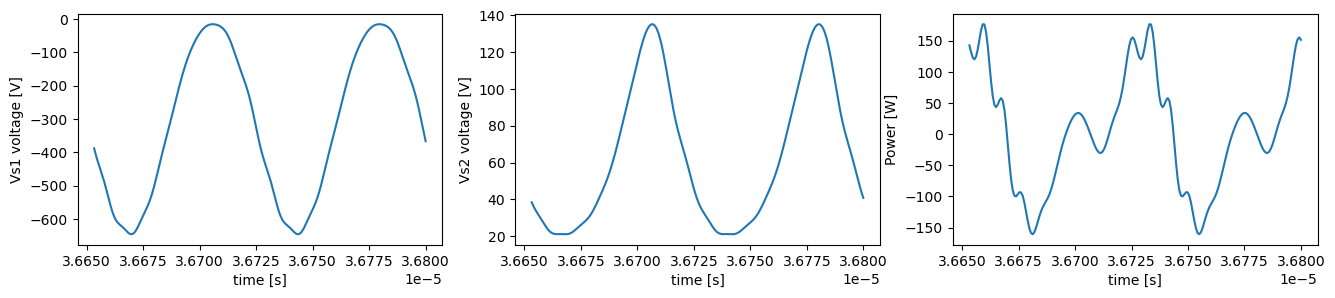

In [17]:
#power_norm = v_norm/i_norm
#print(power_norm)

num_perods_for_integration = 50  # Определить минимально необходимое количество периодов на просчитывать, при котором результат интеграла сходится.
                                 # Это и будет критерий наступления установившегося режима

t_integration = extract_N_periods(time_raw, 1, num_perods_for_integration, 'rev') #data[-(num_perods_for_integration+1)*sim_periods_div:-1*sim_periods_div]

Vpl_integration = extract_N_periods(Vpl_raw, 1, num_perods_for_integration, 'rev')
Ipl_integration = extract_N_periods(Ipl_raw, 1, num_perods_for_integration, 'rev')
Ppl_integration = np.multiply(Vpl_integration, Ipl_integration)

Ppl = get_mean(t_integration, Ppl_integration, num_perods_for_integration) 

print(f'Ppl = {Ppl:.3f} [W]')

Vs1_integration = extract_N_periods(Vs1_raw, 1, num_perods_for_integration, 'rev')
Vs2_integration = extract_N_periods(Vs2_raw, 1, num_perods_for_integration, 'rev')

V_r_rf_integration = extract_N_periods(V_R_rf_raw, 1, num_perods_for_integration, 'rev')
P_R_rf = get_mean(t_integration, np.multiply(V_r_rf_integration, V_r_rf_integration), num_perods_for_integration)/val_R_rf

_Vs1 = get_mean(t_integration, Vs1_integration, num_perods_for_integration)
_Vs2 = get_mean(t_integration, Vs2_integration, num_perods_for_integration)

print(f'_Vs1 = {_Vs1:.3f} [V]')
print(f'_Vs2 = {_Vs2:.3f} [V]')

print(f'PRrf = {P_R_rf:.3f} [W]')
print(f'PRm = {P_R_m:.3f} [W]')
print(f'PRstray = {P_R_stray:.3f} [W]')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))

axs[0].plot(time_2_last_periods, extract_N_periods(Vs1_raw, 1, 2, 'rev'))
axs[0].set_ylabel('Vs1 voltage [V]')
axs[0].set_xlabel('time [s]')

axs[1].plot(time_2_last_periods, extract_N_periods(Vs2_raw, 1, 2, 'rev'))
axs[1].set_ylabel('Vs2 voltage [V]')
axs[1].set_xlabel('time [s]')

axs[2].plot(time_2_last_periods, extract_N_periods(Ppl_integration, 1, 2, 'rev')) # Надо сместить на 1 период!
axs[2].set_ylabel('Power [W]')
_=axs[2].set_xlabel('time [s]')


In [18]:
print(calcMatchingNetwork(0.05, -2, 6.28*80e6, 50))

(-5.55936413133219e-10, 1.2582389036050244e-09)


In [19]:
print(calcMatchingNetwork(1.121, 73.729, 2*np.pi*13.56e6, 50))

(1.769586304655926e-10, 1.5500609934686082e-09)


In [20]:
 print(cmn2(1.121, 73.729, 2*np.pi*f0))

(1.5500609934686084e-09, 0)


In [21]:
ext_config = {
    "name": "PC1",
    "Vm":  180,                                    # Амплитуда ВЧ источника [V]
    "f0":  81.36e6,
    "p0":  5,
    "T0":  300,                                    # Температура буферного газа [К]
    "ne":  1.25e+15,                               # Начальное приближение плотности электронов [м^-3]
    "l_B": 5.7e-2,                                # Толщина bulk плазмы [м]
    "Ae": 0.0366,                                   # Площадь нагруженного электрода [м^2]
    "Ag": 0.0366,                                  # Площадь заземленного электрода [м^2]
    "val_R_rf": 50,
    "val_C_m1": 701e-12,
    "val_C_m2": 128.37e-12,
    "val_L_m2": 40e-9,
    "val_R_m":  0.01,
    "val_C_stray": 350e-12,
    "val_R_stray": 0.03,
    "matching_flag": False                                # Флаг включения итераций согласования
}
print(config)

{'name': 'PC1', 'comment': 'Пример из статьи 0.66 Pa', 'Vm': 100, 'f0': 13560000.0, 'p0': 0.66, 'T0': 300, 'ne': 1250000000000000.0, 'l_B': 0.057, 'Ae': 0.01, 'Ag': 0.03, 'val_R_rf': 50, 'val_C_m1': 1e-10, 'val_C_m2': 1.75e-10, 'val_L_m2': 1.5e-06, 'val_R_m': 0.5, 'val_C_stray': 2e-10, 'val_R_stray': 0.5, 'matching_flag': True, 'eps_ne': 5000000000000.0, 'max_iter_ne': 20, 'verbose_plots': False}


In [22]:
print(circuit)

NameError: name 'circuit' is not defined